In [ ]:
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import os
import random
from tensorflow.keras import models
from tensorflow.keras import layers
from numpy import asarray
import tensorflow as tf
import shutil 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
bad_frames = '/content/drive/MyDrive/final changes/input images'

In [ ]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(100,100))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
print(noisy_frames.shape)

(51, 100, 100, 3)


In [ ]:
good_frames = '/content/drive/MyDrive/final changes/target images'

In [ ]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(100,100))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
print(clean_frames.shape)

(51, 100, 100, 3)


In [ ]:
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

In [ ]:
print(noisy_train.shape,noisy_test.shape)
print(clean_train.shape,clean_test.shape)

(41, 100, 100, 3) (10, 100, 100, 3)
(41, 100, 100, 3) (10, 100, 100, 3)


In [ ]:
input_img = layers.Input(shape=(100, 100, 3))
x = layers.Conv2D(100, (3, 3), padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(100, (3, 3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(100, (3, 3), padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(100, (3, 3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(3, (3, 3), padding='same')(x)
x = layers.BatchNormalization()(x)
decoded = layers.Activation('sigmoid')(x)

model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 100)     2800      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 100)     400       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 100)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 100)       90100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 100)       400   

In [ ]:
history = model.fit(
    x=noisy_train,
    y=clean_train,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_data=(noisy_test, clean_test)
)

Epoch 1/100
2/2 [==============================] - 9s 2s/step - loss: 0.7926 - accuracy: 0.3461 - val_loss: 0.7070 - val_accuracy: 0.7707
Epoch 2/100
2/2 [==============================] - 7s 2s/step - loss: 0.6009 - accuracy: 0.3433 - val_loss: 0.7700 - val_accuracy: 0.0579
Epoch 3/100
2/2 [==============================] - 7s 2s/step - loss: 0.5908 - accuracy: 0.3842 - val_loss: 0.8694 - val_accuracy: 0.0405
Epoch 4/100
2/2 [==============================] - 7s 2s/step - loss: 0.5877 - accuracy: 0.3854 - val_loss: 0.9534 - val_accuracy: 0.1401
Epoch 5/100
2/2 [==============================] - 7s 2s/step - loss: 0.5848 - accuracy: 0.3732 - val_loss: 0.9887 - val_accuracy: 0.8191
Epoch 6/100
2/2 [==============================] - 7s 2s/step - loss: 0.5853 - accuracy: 0.3736 - val_loss: 0.9724 - val_accuracy: 0.9543
Epoch 7/100
2/2 [==============================] - 7s 2s/step - loss: 0.5840 - accuracy: 0.3658 - val_loss: 0.9284 - val_accuracy: 0.9629
Epoch 8/100
2/2 [=================

In [ ]:
print('Final training loss \t', history.history['loss'][-1])

print('Final Validation loss \t', history.history['val_loss'][-1])

Final training loss 	 0.5735342502593994
Final Validation loss 	 0.622360348701477


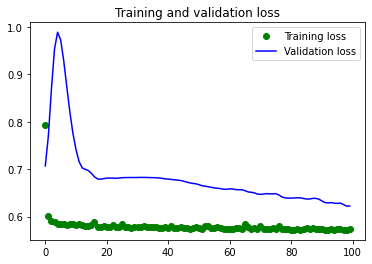

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',c="green")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
results = model.predict(noisy_test)

In [ ]:
image = np.random.randint(0, len(noisy_test))

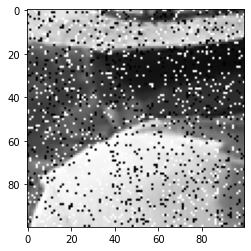

In [ ]:
plt.imshow(noisy_test[image])
plt.show()

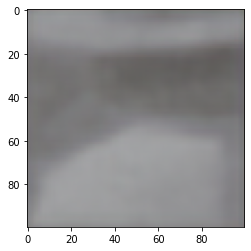

In [ ]:
plt.imshow(results[image])
plt.show()

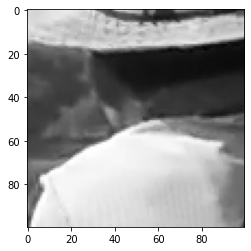

In [ ]:
plt.imshow(clean_test[image])
plt.show()

In [ ]:
from skimage.metrics import peak_signal_noise_ratio

predicted_images = results
psnr_original_mean = 0
psnr_prediction_mean = 0

for gt_img, noisy_img, predicted_img in zip(clean_test, noisy_test, predicted_images):
    psnr_original_mean += peak_signal_noise_ratio(gt_img, noisy_img)
    psnr_prediction_mean += peak_signal_noise_ratio(gt_img, predicted_img)

psnr_original_mean/=clean_test.shape[0]
psnr_prediction_mean/=clean_test.shape[0]
print("Original average gt-noisy PSNR ->", psnr_original_mean)
print("Predicted average gt-predicted PSNR ->", psnr_prediction_mean)

Original average gt-noisy PSNR -> 12.987078554671072
Predicted average gt-predicted PSNR -> 13.914005387473011


In [ ]:
from skimage.metrics import structural_similarity as ssim

predicted_images = results
ssim_original_mean = 0
ssim_prediction_mean = 0

for gt_img, noisy_img, predicted_img in zip(clean_test, noisy_test, predicted_images):
    ssim_original_mean += ssim(gt_img, noisy_img, multichannel=True, data_range=noisy_img.max() - noisy_img.min())
    ssim_prediction_mean += ssim(gt_img, predicted_img, multichannel=True, data_range=predicted_img.max() - predicted_img.min())

ssim_original_mean/=clean_test.shape[0]
ssim_prediction_mean/=clean_test.shape[0]
print("Original average gt-noisy SSIM ->", ssim_original_mean)
print("Predicted average gt-predicted SSIM ->", ssim_prediction_mean)

Original average gt-noisy SSIM -> 0.13908658499223342
Predicted average gt-predicted SSIM -> 0.26662771294457227
